In [1]:
# Dependencies
import os
import tweepy
import json
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Navigate to config file

orig_working_directory = os.getcwd()
os.chdir(os.path.join('..','..'))
curr_working_directory = os.getcwd()
os.getcwd()

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

In [4]:
#Set news accounts to pull tweets from
news_accounts = ['BBC','CBS','CNN','Fox','nytimes']

tweets = []
accounts = []
counts = []


#loop through each account
for account in news_accounts:

    #reset count to zero
    count = 0
    
    #Loop through last 100 tweets
    for tweet in tweepy.Cursor(api.user_timeline, account, tweet_mode='extended').items(100):
        accounts.append(account)
        tweets.append(tweet)
        
        #use count to figure out latest vs 100th tweet
        count = count + 1
        counts.append(count)


In [5]:
tweet_id = []
created_at = []
full_text = []
compound = []
positive = []
negative = []
neutral = []

# Loop through tweets list
for tweet in tweets:
    
    # Run Vader Analysis on each tweet
    sentiment_results = analyzer.polarity_scores(tweet.full_text)
    comp = sentiment_results['compound']
    pos = sentiment_results['pos']
    neg = sentiment_results['neg']
    neu = sentiment_results['neu']
    
    # Add each value lists set above
    tweet_id.append(tweet.id)
    created_at.append(tweet.created_at)
    full_text.append(tweet.full_text)
    compound.append(comp)
    positive.append(pos)
    negative.append(neg)
    neutral.append(neu)
    
    

In [6]:
#Create dataframe
tweets_df = pd.DataFrame({
    'user_name': accounts,
    'Tweet ID': tweet_id,
    'Tweet Time': created_at,
    'Tweet Text': full_text,  
    'Compound': compound,
    'positive': positive,
    'negative': negative,
    'neutral': neutral, 
    'Count': counts
    })

tweets_df.head()

,user_name,Tweet ID,Tweet Time,Tweet Text,Compound,positive,negative,neutral,Count
0,BBC,1264224821493157890,2020-05-23 16:01:00,#FindingDory = perfect weekend film! 🙌🐠\n\n6...,0.6114,0.174,0.000,0.826,1
1,BBC,1264209722007343104,2020-05-23 15:01:00,We hope this brings you some much needed tranq...,0.8074,0.249,0.000,0.751,2
2,BBC,1264179523194703872,2020-05-23 13:01:00,"""If any good can come of me sharing my experie...",0.7184,0.245,0.096,0.660,3
3,BBC,1264176066379296768,2020-05-23 12:47:16,RT @BBCTheOneShow: In support of #MentalHealth...,0.4019,0.172,0.000,0.828,4
4,BBC,1264164423763025920,2020-05-23 12:01:00,Israeli investors develop face mask with remot...,0.0000,0.000,0.000,1.000,5


The first plot will be and/or feature the following:

-Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.

-Each plot point will reflect the compound sentiment of a tweet.

-Sort each plot point by its relative timestamp.

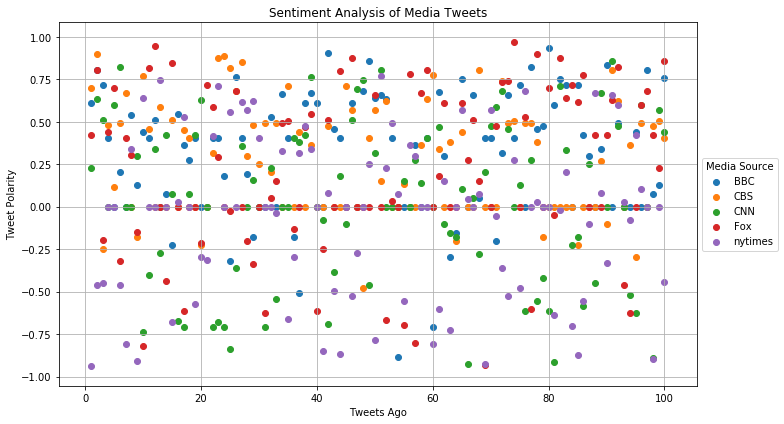

In [7]:
fig, ax = plt.subplots(figsize=(11,6))

for x,y in tweets_df.groupby('user_name'):
    ax.scatter(y['Count'], y['Compound'], label=x)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='Media Source')
ax.grid()   
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.tight_layout()
   
      
plt.savefig("Tweet_Polarity_Scatter.png")
plt.show()

The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

In [8]:
#Create new dataframe that groups original dataframe by username and average "Compound"
grouped_by_user = tweets_df.groupby(['user_name'])
user_avg_compound = grouped_by_user['Compound'].mean()

user_avg_compound = user_avg_compound.to_frame()
user_avg_compound = user_avg_compound.reset_index()
user_avg_compound

,user_name,Compound
0,BBC,0.310002
1,CBS,0.269797
2,CNN,0.030487
3,Fox,0.215978
4,nytimes,-0.050024


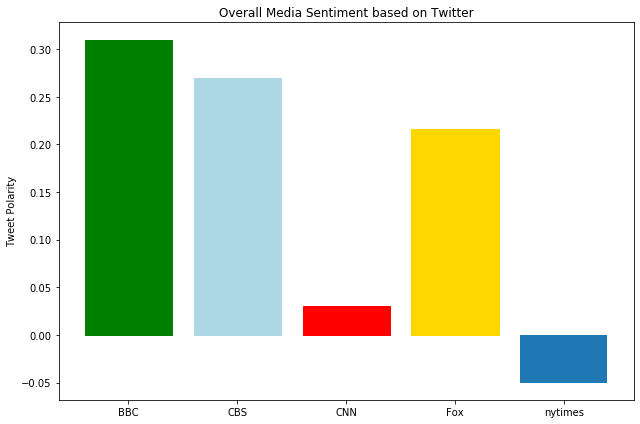

In [9]:
fig, ax = plt.subplots(figsize=(9,6))
barlist = plt.bar(user_avg_compound['user_name'], user_avg_compound['Compound']) 
barlist = barlist[0].set_color('g'), barlist[1].set_color('lightblue'), barlist[2].set_color('r'), barlist[3].set_color('gold')

plt.title(f"Overall Media Sentiment based on Twitter")
plt.ylabel("Tweet Polarity")
plt.tight_layout()  

plt.savefig("User_Sentiment.png")
plt.show()   

#Include a written description of three observable trends based on the data.

1) On average BBC's tweets are the most positive when looking at the last 100 tweets from 5/23/2020
2) One average NY Time's tweets are the most negative when looking at the last 100 tweets from 5/23/2020
3) When looking at all five news sources there are more positive tweets than negative when looking at the last 100 tweets from 5/23/2020